<a href="https://colab.research.google.com/github/omkarumale111/DL-Lab/blob/main/Pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

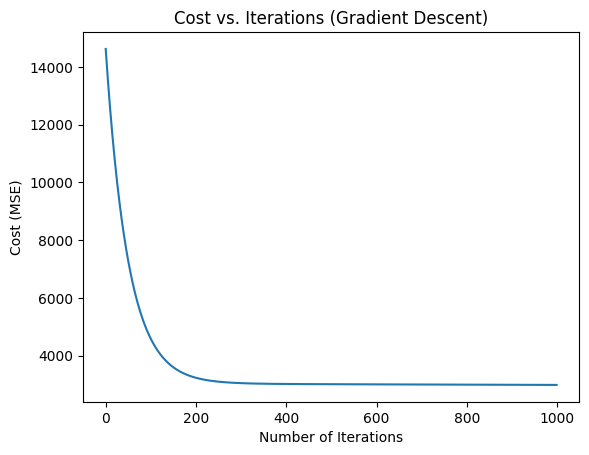

Mean Squared Error (Gradient Descent): 2640.0351291883844
Mean Squared Error (Normal Equation): 2030.9129642474634

Comparison:
Gradient Descent MSE: 2640.0351291883844
Normal Equation MSE: 2030.9129642474634
Parameters (Gradient Descent): [153.69503863  22.27006123]
Parameters (Normal Equation): [152.00335421 998.57768914]


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Extract the BMI feature (index 2) and reshape it
X_bmi = X[:, np.newaxis, 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Add a column of ones to X_train and X_test for the intercept term
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]


def hypothesis(X, theta):
  return X @ theta

def cost_function(X, y, theta):
  m = len(y)
  predictions = hypothesis(X, theta)
  error = predictions - y
  return (1 / (2 * m)) * np.sum(error**2)

def gradient_descent(X, y, theta, alpha, num_iterations):
  m = len(y)
  cost_history = []

  for _ in range(num_iterations):
    predictions = hypothesis(X, theta)
    error = predictions - y
    gradient = (1 / m) * X.T @ error
    theta -= alpha * gradient
    cost_history.append(cost_function(X, y, theta))

  return theta, cost_history

# Initialize parameters theta with zeros
theta_initial = np.zeros((X_train_b.shape[1], 1))

# Set hyperparameters for gradient descent
alpha = 0.01
num_iterations = 1000

# Train the model using gradient descent
theta_gd, cost_history = gradient_descent(X_train_b, y_train.reshape(-1, 1), theta_initial, alpha, num_iterations)

# Plot the cost history to visualize convergence
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs. Iterations (Gradient Descent)")
plt.show()

# Evaluate model performance on the test set
y_pred_gd = hypothesis(X_test_b, theta_gd)
mse_gd = cost_function(X_test_b, y_test.reshape(-1, 1), theta_gd)
print(f"Mean Squared Error (Gradient Descent): {mse_gd}")

# Implement and evaluate Closed-Form Solution (Normal Equation)
theta_normal = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train.reshape(-1, 1)

# Evaluate performance of Normal Equation on the test set
y_pred_normal = hypothesis(X_test_b, theta_normal)
mse_normal = cost_function(X_test_b, y_test.reshape(-1, 1), theta_normal)
print(f"Mean Squared Error (Normal Equation): {mse_normal}")

# Compare the results
print("\nComparison:")
print(f"Gradient Descent MSE: {mse_gd}")
print(f"Normal Equation MSE: {mse_normal}")
print(f"Parameters (Gradient Descent): {theta_gd.flatten()}")
print(f"Parameters (Normal Equation): {theta_normal.flatten()}")